## AugustineUgbeda_vehicleinsurance_project 
the task here is to clean and perpare the data for further analysis

In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import datetime

In [2]:
##bringing in the dataset
vehicleinsurance=pd.read_csv("vehicle claim insurance data.csv")
vehicleinsurance.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [3]:
###checking dimensions of the data
vehicleinsurance.shape

(12079, 14)

In [4]:
##lookoing for NaN
vehicleinsurance.isna().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     359
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              3738
Subject_Car_Colour        6962
Subject_Car_Make          2476
LGA_Name                  6476
State                     6488
ProductName                  0
target                       0
dtype: int64

#### REPLACING OF NA s WITH THE MODE

In [5]:
vehicleinsurance["Gender"]=vehicleinsurance["Gender"].fillna(("Others"),inplace=False)
vehicleinsurance["Car_Category"]=vehicleinsurance["Car_Category"].fillna(vehicleinsurance["Car_Category"].mode()[0])
vehicleinsurance["Subject_Car_Colour"]=vehicleinsurance["Subject_Car_Colour"].fillna(vehicleinsurance["Subject_Car_Colour"].mode()[0])
vehicleinsurance["Subject_Car_Make"]=vehicleinsurance["Subject_Car_Make"].fillna(vehicleinsurance["Subject_Car_Make"].mode()[0])
vehicleinsurance["LGA_Name"]=vehicleinsurance["LGA_Name"].fillna(vehicleinsurance["LGA_Name"].mode()[0])
vehicleinsurance["State"]=vehicleinsurance["State"].fillna(vehicleinsurance["State"].mode()[0])


In [6]:
##reconfirming that replacement of Nas has taken effect
vehicleinsurance.isna().sum()

ID                        0
Policy Start Date         0
Policy End Date           0
Gender                    0
Age                       0
First Transaction Date    0
No_Pol                    0
Car_Category              0
Subject_Car_Colour        0
Subject_Car_Make          0
LGA_Name                  0
State                     0
ProductName               0
target                    0
dtype: int64

In [7]:
#checking the new shape
vehicleinsurance.shape

(12079, 14)

In [8]:
#reconfirm for Na
vehicleinsurance.isna().sum()

ID                        0
Policy Start Date         0
Policy End Date           0
Gender                    0
Age                       0
First Transaction Date    0
No_Pol                    0
Car_Category              0
Subject_Car_Colour        0
Subject_Car_Make          0
LGA_Name                  0
State                     0
ProductName               0
target                    0
dtype: int64

In [9]:
##renaming  the target column
vehicleinsurance = vehicleinsurance.rename(columns={'target': 'No_of_claims_3_mon_period'}, index={'13': '13'})
vehicleinsurance.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,No_of_claims_3_mon_period
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Victoria Island,Lagos,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,Victoria Island,Lagos,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,Saloon,Black,TOYOTA,Lagos,Lagos,Muuve,1


In [10]:
##checking datatypes
vehicleinsurance.dtypes

ID                           object
Policy Start Date            object
Policy End Date              object
Gender                       object
Age                           int64
First Transaction Date       object
No_Pol                        int64
Car_Category                 object
Subject_Car_Colour           object
Subject_Car_Make             object
LGA_Name                     object
State                        object
ProductName                  object
No_of_claims_3_mon_period     int64
dtype: object

In [11]:
# convert the 'policy startDate','policy end date','first transaction date' columns to datetime format
vehicleinsurance['Policy Start Date']= pd.to_datetime(vehicleinsurance['Policy Start Date'])
vehicleinsurance['Policy End Date']= pd.to_datetime(vehicleinsurance['Policy End Date'])
vehicleinsurance['First Transaction Date']= pd.to_datetime(vehicleinsurance['First Transaction Date'])
# Check the changes
vehicleinsurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID                         12079 non-null  object        
 1   Policy Start Date          12079 non-null  datetime64[ns]
 2   Policy End Date            12079 non-null  datetime64[ns]
 3   Gender                     12079 non-null  object        
 4   Age                        12079 non-null  int64         
 5   First Transaction Date     12079 non-null  datetime64[ns]
 6   No_Pol                     12079 non-null  int64         
 7   Car_Category               12079 non-null  object        
 8   Subject_Car_Colour         12079 non-null  object        
 9   Subject_Car_Make           12079 non-null  object        
 10  LGA_Name                   12079 non-null  object        
 11  State                      12079 non-null  object        
 12  Prod

In [12]:
#checking the entries in the 'gender' dataset
vehicleinsurance['Gender'].unique()

array(['Male', 'Female', 'Entity', 'Joint Gender', 'Others', 'NO GENDER',
       'NOT STATED', 'SEX'], dtype=object)

In [13]:
#convert all other gender types apart from male and female to "others" 
vehicleinsurance['Gender'] = np.where(vehicleinsurance['Gender'].str.contains('Entity'), 'Others', vehicleinsurance['Gender'])
vehicleinsurance['Gender'] = np.where(vehicleinsurance['Gender'].str.contains('NO'), 'Others', vehicleinsurance['Gender'])
vehicleinsurance['Gender'] = np.where(vehicleinsurance['Gender'].str.contains('Joint'), 'Others', vehicleinsurance['Gender'])
vehicleinsurance['Gender'] = np.where(vehicleinsurance['Gender'].str.contains('NOT'), 'Others', vehicleinsurance['Gender'])
vehicleinsurance['Gender'] = np.where(vehicleinsurance['Gender'].str.contains('no'), 'Others', vehicleinsurance['Gender'])
vehicleinsurance['Gender'] = np.where(vehicleinsurance['Gender'].str.contains('SEX'), 'Others', vehicleinsurance['Gender'])
#check if changes has been effected
vehicleinsurance["Gender"].unique()

array(['Male', 'Female', 'Others'], dtype=object)

In [14]:
##adding a policy duration column
vehicleinsurance['Policy Duration'] = vehicleinsurance['Policy End Date'] - vehicleinsurance['Policy Start Date']
vehicleinsurance.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,No_of_claims_3_mon_period,Policy Duration
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,Car Classic,0,364 days
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Victoria Island,Lagos,Car Classic,1,364 days
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,Victoria Island,Lagos,Car Classic,0,364 days
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,CarSafe,0,364 days
4,00BRP63,2010-08-29,2010-12-31,Others,20,2010-08-29,3,Saloon,Black,TOYOTA,Lagos,Lagos,Muuve,1,124 days


In [15]:
#extracting the month from policy start date and storing in policy start month
#to carry out summary
vehicleinsurance['policy start month'] = vehicleinsurance['Policy Start Date'].dt.month

vehicleinsurance['policy start month'].mode()##this shows that most policies are started in the first
#month(january) 


0    1
dtype: int64

In [16]:
###checking the unique features of age
vehicleinsurance["Age"].unique()

array([   30,    79,    43,     2,    20,    37,    40,    71,    58,
          45,    51,   120,    38,    81,    69,    31,    70,    34,
           1,    41,    47,    36,    46,    48,    39,    63,    42,
          27,    64,    50,    53,    33,    23,    32,    59,    60,
          52,    54,    44,    11,    78,    28,    29,    57,    12,
          65,    35,    73,    56,    55,    26,    49,    18,    14,
          62,    25,    61,    72,    82,    67,     7,    10,    68,
          21,    76,    24,    66,     3,    93,    22,    77,    19,
          80,     9,     6,   -76,    -2,    89,    74,    75,    84,
          16,    90,   140,     8,     5,    13,    86,    15,   320,
         -12,    83,    85, -6099, -5939,     4,   -22,   144,   112,
          17,     0,    88,   -27,    87,   133,   102,   -51,   128,
         -26,   100], dtype=int64)

### dealing with outliers
here we are removing values greater than 100 and less than 18 as they are not important to our work because in the real sense individuals below the age of 18 and above the age of 100 can't have a vehicle insurance

In [17]:
index=vehicleinsurance[(vehicleinsurance["Age"] >=100)|(vehicleinsurance["Age"]<=18)].index
vehicleinsurance.drop(index,inplace=True)
vehicleinsurance["Age"].describe()

count    11139.000000
mean        42.934016
std         11.759793
min         19.000000
25%         35.000000
50%         41.000000
75%         50.000000
max         93.000000
Name: Age, dtype: float64

#### Descriptive statistics

In [18]:
vehicleinsurance.describe()

,Age,No_Pol,No_of_claims_3_mon_period,Policy Duration,policy start month
count,11139.000000,11139.000000,11139.000000,11139,11139.000000
mean,42.934016,1.287010,0.118143,350 days 04:44:55.394559656,6.415746
std,11.759793,0.710048,0.322792,222 days 18:24:30.087066344,3.507318
min,19.000000,1.000000,0.000000,12 days 00:00:00,1.000000
25%,35.000000,1.000000,0.000000,364 days 00:00:00,3.000000
50%,41.000000,1.000000,0.000000,364 days 00:00:00,7.000000
75%,50.000000,1.000000,0.000000,364 days 00:00:00,10.000000
max,93.000000,10.000000,1.000000,11139 days 00:00:00,12.000000


In [20]:
###saving the cleaned dataset
vehicleinsurance.to_csv('vehicleinsurance_cleaned.csv', index = False)

#### Visualizations

In [21]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Gender', ylabel='count'>

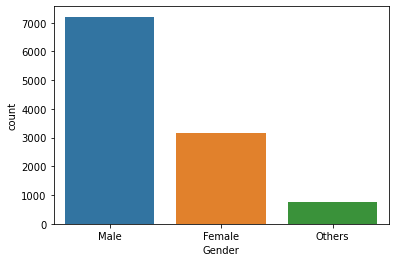

In [22]:
sns.countplot(x="Gender",data=vehicleinsurance)

<AxesSubplot:xlabel='No_of_claims_3_mon_period', ylabel='count'>

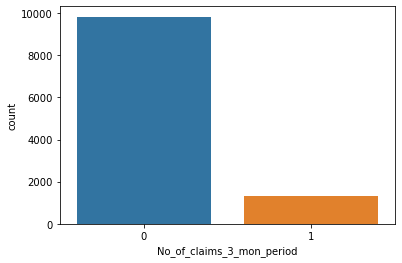

In [23]:
sns.countplot(x="No_of_claims_3_mon_period",data=vehicleinsurance)

Text(0, 0.5, 'No_Pol')

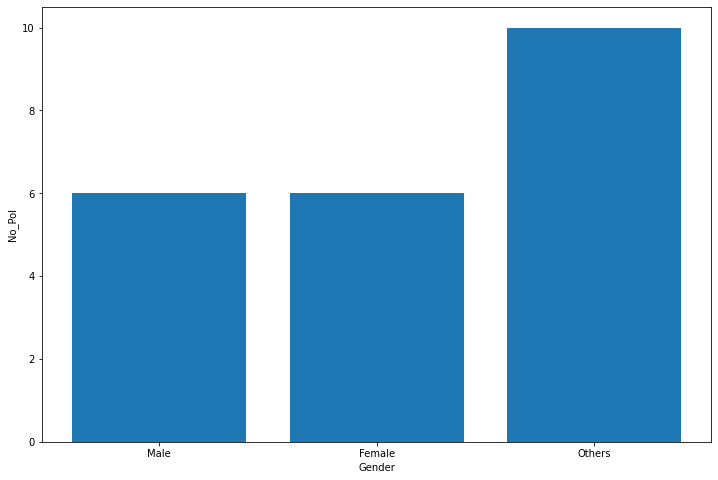

In [24]:
#bar plot
plt.figure(figsize =(12,8))

plt.bar(vehicleinsurance['Gender'], vehicleinsurance['No_Pol'])

plt.xlabel('Gender')
plt.ylabel('No_Pol')

<AxesSubplot:xlabel='Age'>

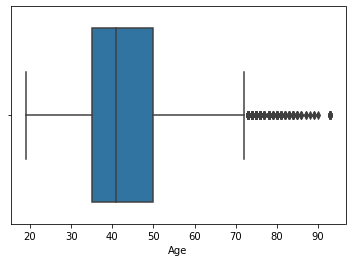

In [25]:
sns.boxplot(data=vehicleinsurance,x="Age")

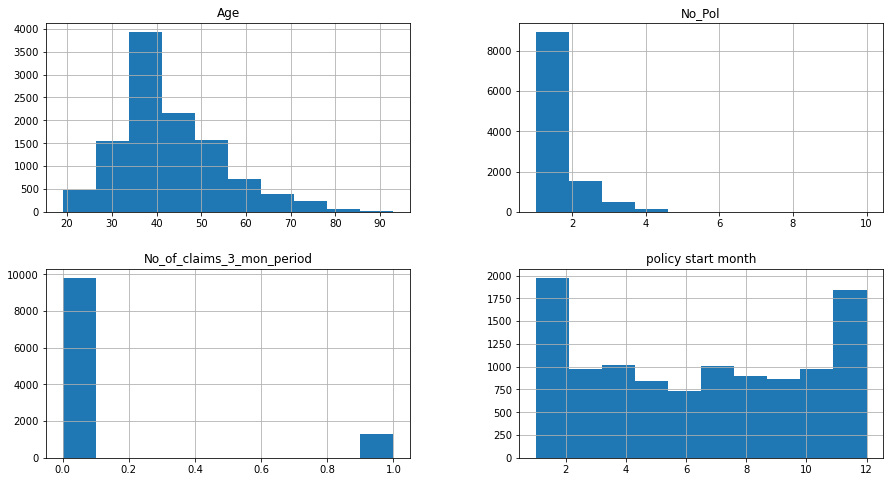

In [26]:
##histogram
vehicleinsurance.hist(figsize = (15,8))
plt.show()

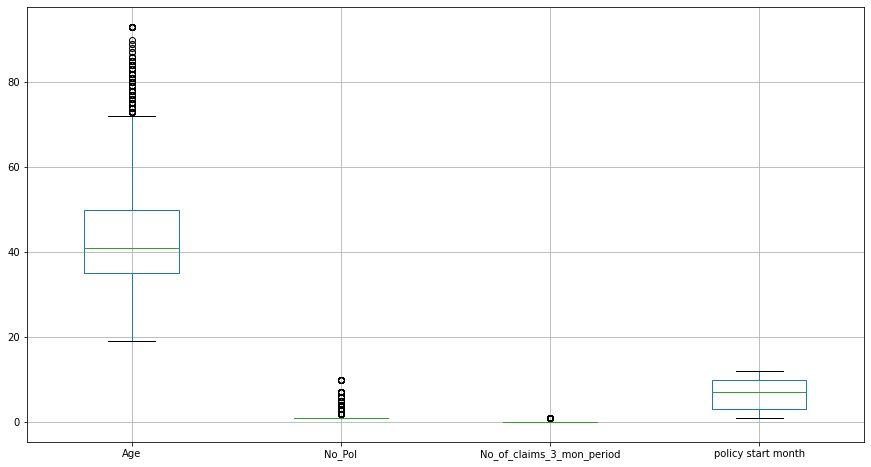

In [27]:
vehicleinsurance.boxplot(figsize = (15,8))
plt.show()

In [43]:
##converting columns to "category" 
vehicleinsurance["Gender"]=vehicleinsurance["Gender"].astype("category")
vehicleinsurance["No_Pol"]=vehicleinsurance["Gender"].astype("category")
vehicleinsurance["Car_Category"]=vehicleinsurance["Car_Category"].astype("category")
vehicleinsurance["Subject_Car_Colour"]=vehicleinsurance["Subject_Car_Colour"].astype("category")
vehicleinsurance["Subject_Car_Make"]=vehicleinsurance["Subject_Car_Make"].astype("category")            
vehicleinsurance["LGA_Name"]=vehicleinsurance["LGA_Name"].astype("category")  
vehicleinsurance["State"]=vehicleinsurance["State"].astype("category") 
vehicleinsurance["ProductName"]=vehicleinsurance["ProductName"].astype("category") 
vehicleinsurance["No_of_claims_3_mon_period"]=vehicleinsurance["No_of_claims_3_mon_period"].astype("category") 


,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,No_of_claims_3_mon_period,Policy Duration,policy start month
0,0040R73,2010-05-14,2011-05-13,1,30,2010-05-14,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,Car Classic,0,364 days,5
1,0046BNK,2010-11-29,2011-11-28,0,79,2010-11-29,0,JEEP,Grey,TOYOTA,Victoria Island,Lagos,Car Classic,1,364 days,11
2,005QMC3,2010-03-21,2011-03-20,1,43,2010-03-21,1,Saloon,Red,TOYOTA,Victoria Island,Lagos,Car Classic,0,364 days,3
4,00BRP63,2010-08-29,2010-12-31,2,20,2010-08-29,2,Saloon,Black,TOYOTA,Lagos,Lagos,Muuve,1,124 days,8
5,00D3EF6,2010-10-21,2011-10-20,1,37,2010-10-21,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,Car Classic,0,364 days,10


In [56]:
##to check if conversion has taken place
vehicleinsurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11139 entries, 0 to 12078
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   ID                         11139 non-null  object         
 1   Policy Start Date          11139 non-null  datetime64[ns] 
 2   Policy End Date            11139 non-null  datetime64[ns] 
 3   Gender                     11139 non-null  category       
 4   Age                        11139 non-null  int64          
 5   First Transaction Date     11139 non-null  datetime64[ns] 
 6   No_Pol                     11139 non-null  category       
 7   Car_Category               11139 non-null  category       
 8   Subject_Car_Colour         11139 non-null  category       
 9   Subject_Car_Make           11139 non-null  category       
 10  LGA_Name                   11139 non-null  category       
 11  State                      11139 non-null  category   

### Label encoding
using Label encoding to encode certain columns to numerical values because most algorithms work
better with numerical inputs.this approach requires the category column to be "category" datatype hence the codes above where we changed columns to category types.note we won't be encoding the target variable("No_of_claims_3_mon_period")

In [44]:
#assign numerical values and storing them in other columns
vehicleinsurance["Gender_cat"]=vehicleinsurance["Gender"].cat.codes
vehicleinsurance["No_Pol_cat"]=vehicleinsurance["No_Pol"].cat.codes
vehicleinsurance["Car_Category_cat"]=vehicleinsurance["Car_Category"].cat.codes
vehicleinsurance["Subject_Car_Colour_cat"]=vehicleinsurance["Subject_Car_Colour"].cat.codes
vehicleinsurance["Subject_Car_Make_cat"]=vehicleinsurance["Subject_Car_Make"].cat.codes           
vehicleinsurance["LGA_Name_cat"]=vehicleinsurance["LGA_Name"].cat.codes  
vehicleinsurance["State_cat"]=vehicleinsurance["State"].cat.codes 
vehicleinsurance["ProductName_cat"]=vehicleinsurance["ProductName"].cat.codes



In [47]:
vehicleinsurance.head()#to view the changes

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,...,Policy Duration,policy start month,Gender_cat,No_Pol_cat,Car_Category_cat,Subject_Car_Colour_cat,Subject_Car_Make_cat,LGA_Name_cat,State_cat,ProductName_cat
0,0040R73,2010-05-14,2011-05-13,1,30,2010-05-14,1,Saloon,Black,TOYOTA,...,364 days,5,1,1,8,4,61,245,73,1
1,0046BNK,2010-11-29,2011-11-28,0,79,2010-11-29,0,JEEP,Grey,TOYOTA,...,364 days,11,0,0,2,25,61,245,73,1
2,005QMC3,2010-03-21,2011-03-20,1,43,2010-03-21,1,Saloon,Red,TOYOTA,...,364 days,3,1,1,8,31,61,245,73,1
4,00BRP63,2010-08-29,2010-12-31,2,20,2010-08-29,2,Saloon,Black,TOYOTA,...,124 days,8,2,2,8,4,61,155,73,8
5,00D3EF6,2010-10-21,2011-10-20,1,37,2010-10-21,1,Saloon,Black,TOYOTA,...,364 days,10,1,1,8,4,61,245,73,1


In [55]:
##creating a new dataframe of all the columns i need for my machine learning
vehicle=vehicleinsurance[["Age","Gender_cat","No_Pol_cat","Car_Category_cat","Subject_Car_Colour_cat","Subject_Car_Make_cat","LGA_Name_cat","State_cat","ProductName_cat"
                         ,"No_of_claims_3_mon_period"]]
vehicle.head()

,Age,Gender_cat,No_Pol_cat,Car_Category_cat,Subject_Car_Colour_cat,Subject_Car_Make_cat,LGA_Name_cat,State_cat,ProductName_cat,No_of_claims_3_mon_period
0,30,1,1,8,4,61,245,73,1,0
1,79,0,0,2,25,61,245,73,1,1
2,43,1,1,8,31,61,245,73,1,0
4,20,2,2,8,4,61,155,73,8,1
5,37,1,1,8,4,61,245,73,1,0


In [53]:
vehicle.describe()

,Age,Gender_cat,No_Pol_cat,Car_Category_cat,Subject_Car_Colour_cat,Subject_Car_Make_cat,LGA_Name_cat,State_cat,ProductName_cat
count,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000
mean,42.934016,0.784810,0.784810,6.965796,8.754825,49.869198,201.726457,66.774306,2.548344
std,11.759793,0.553737,0.553737,2.375278,10.629240,16.444715,69.703088,18.313197,2.014731
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,8.000000,4.000000,36.000000,157.000000,73.000000,1.000000
50%,41.000000,1.000000,1.000000,8.000000,4.000000,61.000000,245.000000,73.000000,1.000000
75%,50.000000,1.000000,1.000000,8.000000,4.000000,61.000000,245.000000,73.000000,5.000000
max,93.000000,2.000000,2.000000,15.000000,43.000000,66.000000,255.000000,110.000000,8.000000


In [71]:
##scale some columns in our dataset to normalise,(do not scale target column(No_of_claims_3_mon_period))most 
#machine learning classifiers prefer this
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler()
cols_to_norm=["Age","Gender_cat","No_Pol_cat","Car_Category_cat","Subject_Car_Colour_cat","Subject_Car_Make_cat","LGA_Name_cat","State_cat","ProductName_cat"
                         ]
vehicle[cols_to_norm]=min_max_scaler.fit_transform(vehicle[cols_to_norm])

<ipython-input-71-2bbbfe921b03>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle[cols_to_norm]=min_max_scaler.fit_transform(vehicle[cols_to_norm])
C:\Users\augustine ugbeda\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [72]:
vehicle.describe()

,Age,Gender_cat,No_Pol_cat,Car_Category_cat,Subject_Car_Colour_cat,Subject_Car_Make_cat,LGA_Name_cat,State_cat,ProductName_cat
count,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000,11139.000000
mean,0.323433,0.392405,0.392405,0.464386,0.203601,0.755594,0.791084,0.607039,0.318543
std,0.158916,0.276869,0.276869,0.158352,0.247192,0.249162,0.273345,0.166484,0.251841
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.216216,0.000000,0.000000,0.533333,0.093023,0.545455,0.615686,0.663636,0.125000
50%,0.297297,0.500000,0.500000,0.533333,0.093023,0.924242,0.960784,0.663636,0.125000
75%,0.418919,0.500000,0.500000,0.533333,0.093023,0.924242,0.960784,0.663636,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
### calculating correlation matrix

In [73]:
vehicle_corr=vehicle.corr()
vehicle_corr

,Age,Gender_cat,No_Pol_cat,Car_Category_cat,Subject_Car_Colour_cat,Subject_Car_Make_cat,LGA_Name_cat,State_cat,ProductName_cat
Age,1.000000,-0.041600,-0.041600,-0.135818,-0.055224,-0.060232,-0.074961,-0.037564,0.021320
Gender_cat,-0.041600,1.000000,1.000000,0.088058,-0.018300,0.001533,0.002059,0.010828,0.073265
No_Pol_cat,-0.041600,1.000000,1.000000,0.088058,-0.018300,0.001533,0.002059,0.010828,0.073265
Car_Category_cat,-0.135818,0.088058,0.088058,1.000000,-0.053710,0.164877,0.123798,0.064763,0.133522
Subject_Car_Colour_cat,-0.055224,-0.018300,-0.018300,-0.053710,1.000000,-0.034227,-0.083334,-0.029274,-0.294261
Subject_Car_Make_cat,-0.060232,0.001533,0.001533,0.164877,-0.034227,1.000000,0.072923,0.023993,-0.005951
LGA_Name_cat,-0.074961,0.002059,0.002059,0.123798,-0.083334,0.072923,1.000000,0.587480,0.292166
State_cat,-0.037564,0.010828,0.010828,0.064763,-0.029274,0.023993,0.587480,1.000000,0.174188
ProductName_cat,0.021320,0.073265,0.073265,0.133522,-0.294261,-0.005951,0.292166,0.174188,1.000000


#### visualization to show correlation between variables

<AxesSubplot:>

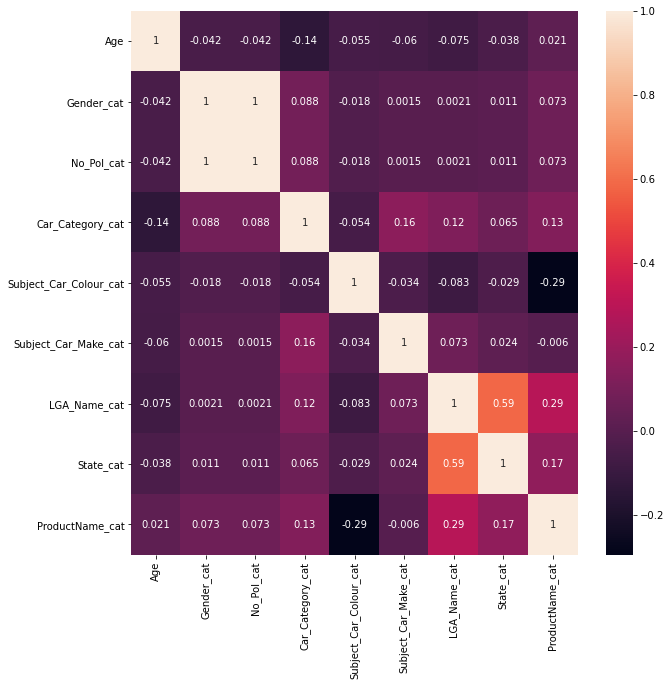

In [74]:

plt.figure(figsize=(10,10))
sns.heatmap(vehicle_corr,annot=True)

#### splitting our dataset into two

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',probability=True)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [75]:
# x are all our features (after droping our target "No_of_claims_3_mon_period")
# y is the target we are trying to predict ("No_of_claims_3_mon_period")
x = vehicle.drop("No_of_claims_3_mon_period", axis=1)
y = vehicle["No_of_claims_3_mon_period"]

In [80]:
 

#1. Training data to train all our classifiers on real data and
#2. Test data to evaluate their performance on unseen data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#Test size is 0.2 means we would be training each of our 
#classifiers with 80% of the data and validating them with the 
#remaining 20%.

# x_train - 80% of the features for training our classifiers algorithms
# y_train - 80% of the corresponding target(No_of_claims_3_mon_period) for
#training our classifiers algorithms

# x_test - Remaining 20% of our features for testing the performance 
#of our classifiers from the training phase above by producing - "y_pred".

# y_test - Remaining 20% of the corresponding target. Used in comparing
#actuals (y_test) with y_pred (predictions made)

#Random state guarantee that same sequence of random numbers are
#generated for training each of our classifiers

In [81]:
x_train.shape

(8911, 9)

In [83]:
y_train.shape#80% of target variable (No_of_claims_3_mon_period) - 8911 records

(8911,)

In [84]:
x_test.shape

(2228, 9)

In [85]:
#20% of target variable (Outcome) - 2228 records
y_test.shape

(2228,)

implementing machine learning algorithms on dataset

In [86]:
#Define the Machine Learning Classifiers
lr = LogisticRegression() 
gs = GaussianNB()
sv = SVC(kernel='rbf', random_state=0)
gb= GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)
kn = KNeighborsClassifier(n_neighbors = 18) 
ad = AdaBoostClassifier(n_estimators=100, random_state=0)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators = 70)

In [87]:
#Fit function trains all our machine learning classifiers on 80% of our data.
lr.fit(x_train, y_train);
gs.fit(x_train, y_train);
svclassifier.fit(x_train, y_train);
gb.fit(x_train,y_train);
kn.fit(x_train,y_train);
ad.fit(x_train,y_train);
dt.fit(x_train, y_train);
rf.fit(x_train, y_train);

In [89]:
#Get individual classifiers training scores
print("Training_score_LogisticRegression : " , lr.score(x_train, y_train))
print("Training_score_GaussianNB : " , gs.score(x_train, y_train))
print("Training_score_SVC : " , svclassifier.score(x_train, y_train))
print("Training_score_GradientBoostingClassifier : " , gb.score(x_train, y_train))
print("Training_score_KNeighborsClassifier : " , kn.score(x_train, y_train))
print("Training_score_ AdaBoostClassifier: " , ad.score(x_train, y_train))
print("Training_score_DecisionTree : " , dt.score(x_train, y_train))
print("Training_score_randomForest : " , rf.score(x_train, y_train))

Training_score_LogisticRegression :  0.8835147570418583
Training_score_GaussianNB :  0.8190999887779149
Training_score_SVC :  0.8835147570418583
Training_score_GradientBoostingClassifier :  0.8871058242621479
Training_score_KNeighborsClassifie :  0.8859836157558074
Training_score_ AdaBoostClassifier:  0.8854225115026372
Training_score_DecisionTree :  0.9414207159690271
Training_score_randomForest :  0.941308495118393


#### TESTING FOR ALL OUR CLASSIFIERS

In [90]:
# Predict targets for unseen dataset (x_test) by using all our classifiers
y_pred1 = lr.predict(x_test)
y_pred2 = gs.predict(x_test)
y_pred3 = svclassifier.predict(x_test)
y_pred4 = gb.predict(x_test)
y_pred5 = kn.predict(x_test)
y_pred6 = ad.predict(x_test)
y_pred7 = dt.predict(x_test)
y_pred8 = rf.predict(x_test)

In [91]:
# Get accuracy score which show the predictive power of each 
#classifier at classifying correct 'outcome'(WHETHER THERE WILL BE AN INSURANCE CLAIM IN 3 MONTHS OR NOT)
print("Testing_score_LogisticRegression : ", accuracy_score(y_test, y_pred1))
print("Testing_score_GaussianNB : ", accuracy_score(y_test, y_pred2))
print("Testing_score_SVC : ", accuracy_score(y_test, y_pred3))
print("Testing_score_GradientBoostingClassifier : ", accuracy_score(y_test, y_pred4))
print("Testing_score_KNeighborsClassifier : ", accuracy_score(y_test, y_pred5))
print("Testing_score_AdaBoostClassifier : ", accuracy_score(y_test, y_pred6))
print("Testing_score_DecisionTree : ", accuracy_score(y_test, y_pred7))
print("Testing_score_randomForest : ", accuracy_score(y_test, y_pred8))


Testing_score_LogisticRegression :  0.8747755834829444
Testing_score_GaussianNB :  0.8105924596050269
Testing_score_SVC :  0.8752244165170556
Testing_score_GradientBoostingClassifier :  0.8761220825852782
Testing_score_KNeighborsClassifier :  0.8720825852782765
Testing_score_AdaBoostClassifier :  0.8734290843806104
Testing_score_DecisionTree :  0.822262118491921
Testing_score_randomForest :  0.8451526032315978


from the above we can say that most of the classifiers are okay to use since they have consistent test and training scores except random forest and decisiomn tree.for the purpose of this work,i will use gradient boosting classifier

Accuracy of the GBM on training set: 0.89


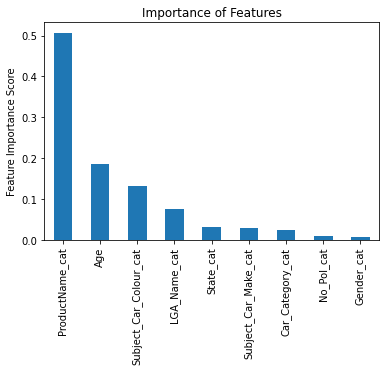

In [93]:
### Get important features in the training set using our best 
# model - Gradient Boosting Classifier
predictors=list(x_train)
feat_imp = pd.Series(gb.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

#Re-print accuracy of Gradient Boosting in the training phase.
print('Accuracy of the GBM on training set: {:.2f}'.format(gb.score(x_train, y_train)))

#product name, Age  and car colour are the only important features, 
#but Boosting help us to combine the other weak learners 
#into a single strong learner.

In [95]:
#Extract the predictions OF OUR  ML CLASSIFIER into a dataframe
gb_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred4})

In [96]:
gb_results['y_pred'].value_counts()

0    2216
1      12
Name: y_pred, dtype: int64

In [97]:
unique, counts = np.unique(y_pred4, return_counts = True)
print(np.asarray((unique, counts)).T)

[[   0 2216]
 [   1   12]]


In [98]:
gb_results

,y_test,y_pred
845,0,0
1404,0,0
7853,0,0
7449,1,0
6678,0,0
...,...,...
6989,0,0
7904,0,0
9094,0,0
36,0,0


In [99]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred4)
print(cf_matrix)

[[1945    5]
 [ 271    7]]


k-Fold Cross Validation using the Gradient Boosting Classifier
K-fold Cross Validation(CV) divide the data into folds and ensure that each fold is used as a testing set at some point. (This ensures all folds have equal chance of featuring as test set and train set at some point).

In [101]:
# Evaluate the Gradiant Boosting Classifier With k-Fold Cross Validation
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=None)
results = cross_val_score(gb, x, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100,results.std()*100))

Accuracy: 88.20% (0.71%)


#### ROC AUC Plots to Evaluate the Performance of all our Classifiers

#It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number #of different candidate threshold values between 0.0 and 1.0.

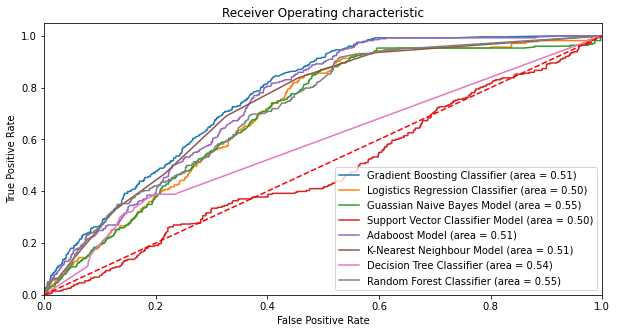

In [102]:
#calculate values for ROC AUC plot
gb_roc_auc = roc_auc_score(y_test, gb.predict(x_test))
fprgb, tprgb, thresholdsgb = roc_curve(y_test, gb.predict_proba(x_test)[:,1])

lr_roc_auc = roc_auc_score(y_test, lr.predict(x_test))
fprlr, tprlr, thresholdslr = roc_curve(y_test, lr.predict_proba(x_test)[:,1])

gs_roc_auc = roc_auc_score(y_test, gs.predict(x_test))
fprgs, tprgs, thresholdsgs = roc_curve(y_test, gs.predict_proba(x_test)[:,1])

ad_roc_auc = roc_auc_score(y_test, ad.predict(x_test))
fprad, tprad, thresholdsad = roc_curve(y_test, ad.predict_proba(x_test)[:,1])

kn_roc_auc = roc_auc_score(y_test, kn.predict(x_test))
fprkn, tprkn, thresholdskn = roc_curve(y_test, kn.predict_proba(x_test)[:,1])

dt_roc_auc = roc_auc_score(y_test, dt.predict(x_test))
fprdt, tprdt, thresholdsdt = roc_curve(y_test, dt.predict_proba(x_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
fprrf, tprrf, threshozldsrt = roc_curve(y_test, rf.predict_proba(x_test)[:,1])

svclassifier_roc_auc = roc_auc_score(y_test, svclassifier.predict(x_test))
fprsv, tprsv, thresholdssv = roc_curve(y_test, svclassifier.predict_proba(x_test)[:,1])


plt.figure(figsize=(10,5))
plt.plot(fprgb, tprgb, label='Gradient Boosting Classifier (area = %0.2f)' % gb_roc_auc)
plt.plot(fprlr, tprlr, label='Logistics Regression Classifier (area = %0.2f)' % lr_roc_auc)
plt.plot(fprgs, tprgs, label='Guassian Naive Bayes Model (area = %0.2f)' % gs_roc_auc)
plt.plot(fprsv, tprsv, label='Support Vector Classifier Model (area = %0.2f)' % svclassifier_roc_auc)
plt.plot(fprad, tprad, label='Adaboost Model (area = %0.2f)' % ad_roc_auc)
plt.plot(fprkn, tprkn, label='K-Nearest Neighbour Model (area = %0.2f)' % kn_roc_auc)
plt.plot(fprdt, tprdt, label='Decision Tree Classifier (area = %0.2f)' % dt_roc_auc)
plt.plot(fprrf, tprrf, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#ROC AUC: It tells how much model is capable of seperating classes. #Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. #By analogy, Higher the AUC, better the model is at distinguishing if insurance policy holders will make a claim after a 3 months period.

Here Again we see that the Gradiant Boosting Classifier has the best ROC AUC (area = 0.9) followed by the logistic regression.